# Preamble

- This workbook will help you gather data from the BofA Merrill Lynch corporate indexes series
- In particular yield, total return and Option adjusted spread data
- Please note the data access is done via NASDAQ Link with a free account as such the data is not exhaustive (missing indexes especially on OAS)
- Register for a FREE API Key on the NASDAQ Link website to be able to run this workbook as well

#### Deliverables

- The workbook illustrate a basic Pandas worklow coupled with the NASDQ Link python library to extract data in bulk
- This could apply to any other data present on the website
- WE HAVE FOUND THEIR LIBRARY TO SLOW - For high through put workflow most likely we would use requests or curl to get JSON data instead...
- The set up presented here works for daily non time sensitive data

-> Excel Spreadsheets

-> Automated charts

-> Automated tables

In [83]:
# Importing libraries
import nasdaqdatalink
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [70]:
# Loading up API KEY
nasdaqdatalink.read_key(filename="nasdaq.key")

# 1. Yield Data

In [125]:
#Dictionary hosting the tickers and associated index names for yield data
#This need to be passed to the NASDAQ Link library

yield_tickers= {'ML/AAY' : 'US AA Bond Index Yield',
                'ML/AEY' :	'US Corporate Bond A rated Index Yield',
                'ML/BBBEY' : 'US BBB Bond Index Yield',
                'ML/BBY' : 'US High Yield BB Corporate Bond Index Yield',
                'ML/BEY' : 'US B rated Corporate Bond Index Yield',
                'ML/CCCY' : 'US CCC-rated Bond Index Yield',
                'ML/EEMCBI' : 'Euro Emerging Markets Corporate Bond Index Yield',
                'ML/EMHGY' : 'Emerging Markets High Grade Corporate Bond Index Yield',
                'ML/EMHYY' : 'Emerging Markets High Yield Corporate Bond Index Yield',
                'ML/USEY' : 'US Corporate Bond Index Yield',
                'ML/USTRI' : 'US High Yield Corporate Bond Index Yield'
                }

In [126]:
# Isolating tickers in a list
tickers = list(yield_tickers.keys())
# Isolating labels in a list
labels = list(yield_tickers.values())

In [127]:
#Fetching all the yield data and storeing it into a pandas data frame
# NASDAQ Link uses pandas or numpy by defaut. Since this is daily data and
# not really time sensitive (Asset allocation related) we're fine using pandas.
yield_data = nasdaqdatalink.get(tickers)

In [146]:
#Removing all them nasty headers given by Nasdaq and using some ACTUAL READABLE ONES...
old_headers = yield_data.columns.to_list()
column_mapping = {old_header: labels for old_header, labels in zip(yield_data.columns, labels)}
yield_data.rename(columns=column_mapping, inplace=True)

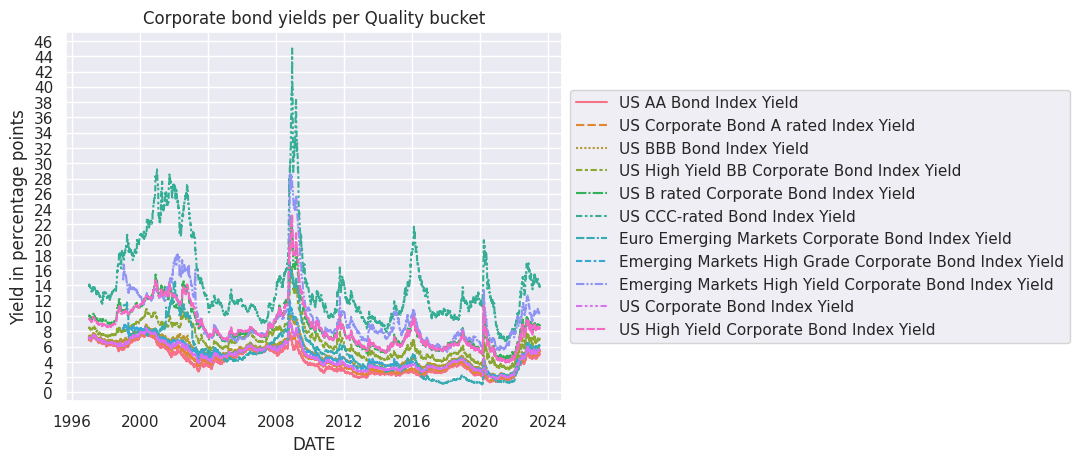

In [148]:
# Graph the whole thing
#sns.set_theme()
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)
g = sns.lineplot(data=yield_data)
g.set_title("Corporate bond yields per Quality bucket");
g.set(ylabel='Yield in percentage points')  # Set the common y-axis label
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
g.yaxis.set_major_locator(ticker.MultipleLocator(base=2))  # Set the major tick locator to every 5 units
g.yaxis.set_minor_locator(ticker.MultipleLocator(base=1))  # Set the minor tick locator to every 1 unit

In [150]:
yield_data_2023 = yield_data[yield_data.index.year == 2023]

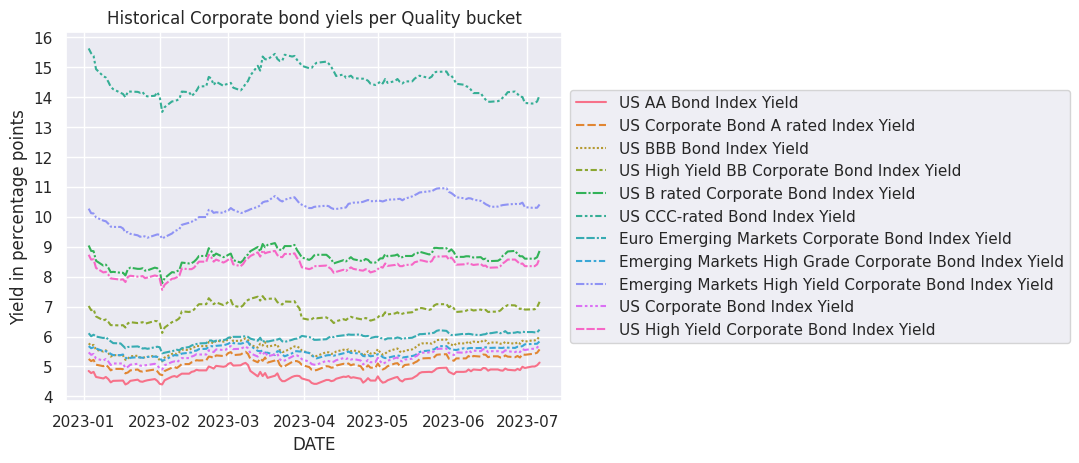

In [153]:
# Graph the whole thing
#sns.set_theme()
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)
g = sns.lineplot(data=yield_data_2023, linestyle='-')
g.set_title("Historical Corporate bond yiels per Quality bucket");
g.set(ylabel='Yield in percentage points')  # Set the common y-axis label
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
g.yaxis.set_major_locator(ticker.MultipleLocator(base=1))  # Set the major tick locator to every 5 units
g.yaxis.set_minor_locator(ticker.MultipleLocator(base=1))  # Set the minor tick locator to every 1 unit

In [154]:
# Save to excel
yield_data.to_excel("BofA_corp_indexes.xlsx", sheet_name='Yield')  

# 2. Spread Data:
- Spread data is patchy but we still get some indexes for free

In [158]:
oas_tickers = { 'ML/AAOAS' : 'US AA-rated Bond Index OAS',
                'ML/EMCBI'	: 'Emerging Markets Corporate Bond Index OAS',
                'ML/HYOAS'	: 'US High Yield Corporate Bond Index OAS',
                'ML/BOAS'	: 'US B-rated Bond Index OAS'
            }

In [159]:
# Isolating tickers in a list
tickers = list(oas_tickers.keys())
# Isolating labels in a list
labels = list(oas_tickers.values())

In [160]:
#Fetchin' the spread data
oas_data = nasdaqdatalink.get(tickers)

In [161]:
#Removing all them nasty headers given by Nasdaq and using some ACTUAL READABLE ONES...
old_headers = oas_data.columns.to_list()
column_mapping = {old_header: labels for old_header, labels in zip(oas_data.columns, labels)}
oas_data.rename(columns=column_mapping, inplace=True)

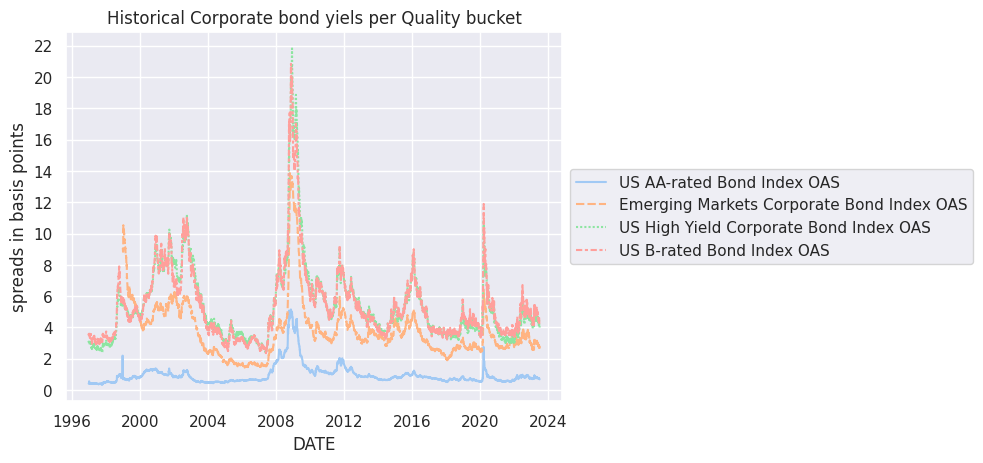

In [162]:
# Graph the whole thing
#sns.set_theme()
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)
g = sns.lineplot(data=oas_data, linestyle='-')
g.set_title("Historical Corporate bond yiels per Quality bucket");
g.set(ylabel='spreads in basis points')  # Set the common y-axis label
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside the plot
g.yaxis.set_major_locator(ticker.MultipleLocator(base=2))  # Set the major tick locator to every 5 units
g.yaxis.set_minor_locator(ticker.MultipleLocator(base=1))  # Set the minor tick locator to every 1 unit

In [175]:
# Save to excel
with pd.ExcelWriter("BofA_corp_indexes.xlsx",
                    mode='a') as writer:  
    oas_data.to_excel(writer, sheet_name='OAS')


# 3.Total Return

In [169]:
tr_tickers = {  'ML/AAATRI' : 'US AAA Corporate Bond Total Return Index',
                'ML/AATRI' : 'US AA Rated Total Return Index',
                'ML/ATRI' : 'US Corporate Bond A Total Return Index',
                'ML/BBBTRI' : 'US Corporate BBB Total Return Index',
                'ML/BBTRI' : 'US BB Bond Total Return Index',
                'ML/BTRI' : 'US B Corporate Bond Total Return Index',
                'ML/CCCTRI' : 'US CCC Bond Total Return Index',
                'ML/EMCTRI' :	'Emerging Markets Corporate Bond Total Return Index',
                'ML/EMHG' : 'Europe/Middle East/Africa (EMEA) Corporate Bond Total Return Index',
                'ML/IGEM' : 'IG Emerging Markets Corporate Bond Total Return Index',
                'ML/TRI':	'US Corporate Bonds Total Return Index'
}


In [170]:
# Isolating tickers in a list
tickers = list(tr_tickers.keys())
# Isolating labels in a list
labels = list(tr_tickers.values())

In [171]:
#Fetching all the TR data and storeing it into a pandas data frame
# NASDAQ Link uses pandas or numpy by defaut. Since this is daily data and
# not really time sensitive (Asset allocation related) we're fine using pandas.
tr_data = nasdaqdatalink.get(tickers)

In [172]:
#Removing all them nasty headers given by Nasdaq and using some ACTUAL READABLE ONES...
old_headers = tr_data.columns.to_list()
column_mapping = {old_header: labels for old_header, labels in zip(tr_data.columns, labels)}
tr_data.rename(columns=column_mapping, inplace=True)

In [176]:
# Save to excel
with pd.ExcelWriter("BofA_corp_indexes.xlsx",
                    mode='a') as writer:  
    tr_data.to_excel(writer, sheet_name='total_return')